<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_IBurrington/blob/main/HW5/timeSeriesClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis on population trends

## Imports

In [ ]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
from sklearn import cluster
import numpy as np
pl.rcParams['font.size'] = 18

In [ ]:
pip install xlrd==1.2.0

# Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/dsps

/content/drive/MyDrive/dsps


In [ ]:
#reading in the data
pop_df = pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + list(range(4,100)), skiprows=3).set_index("Country Name")

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [ ]:
# remove NAs
pop_df_clean = pop_df.dropna(axis=1, how="all").dropna(axis=0, how="any")

In [ ]:
# looking a little at the data
pop_df_clean.shape

(262, 61)

In [ ]:
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


In [ ]:
# standardizing the data
pop_standard = preprocessing.scale(pop_df_clean, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


In [ ]:
pop_df_clean.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

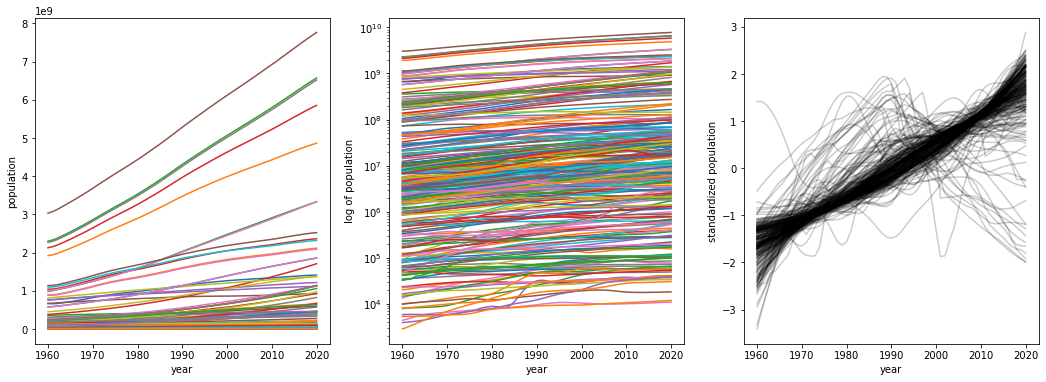

In [180]:
# looking at the data
fig, ax = pl.subplots(1,3, figsize=(18,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
pop_df_clean.T.plot(legend=False, logy=True, ax=ax[1])
ax[2].plot(pop_standard.T, color="k", alpha=0.2)

ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[1].set_xlabel("year")
ax[1].set_ylabel("log of population")
ax[2].set_xlabel("year")
ax[2].set_ylabel("standardized population")
ax[2].set_xticks(range(0,70,10))
ax[2].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);

Fig. 1: a plot of a population time series covering 1960-2020 (left), the same data with log y (center), the same data standardized by subtracting the mean and dividing by the standard deviation. Although the left plot suggests a general upward trend, it's hard to see outliers with this much data. The log-y plot shows us a little more information, but it's only with the standardized data that outliers with big population drops become clear.



In [ ]:
# time for a k-means cluster!!
c = cluster.k_means(pop_standard, 4)

In [ ]:
for i in range(4):
  print ("total items in cluster {:d}: {:d}".format(
      i+1, np.sum(c[1] == i)))

total items in cluster 1: 10
total items in cluster 2: 116
total items in cluster 3: 110
total items in cluster 4: 26


In [ ]:
pop_df_clean.shape

(262, 61)

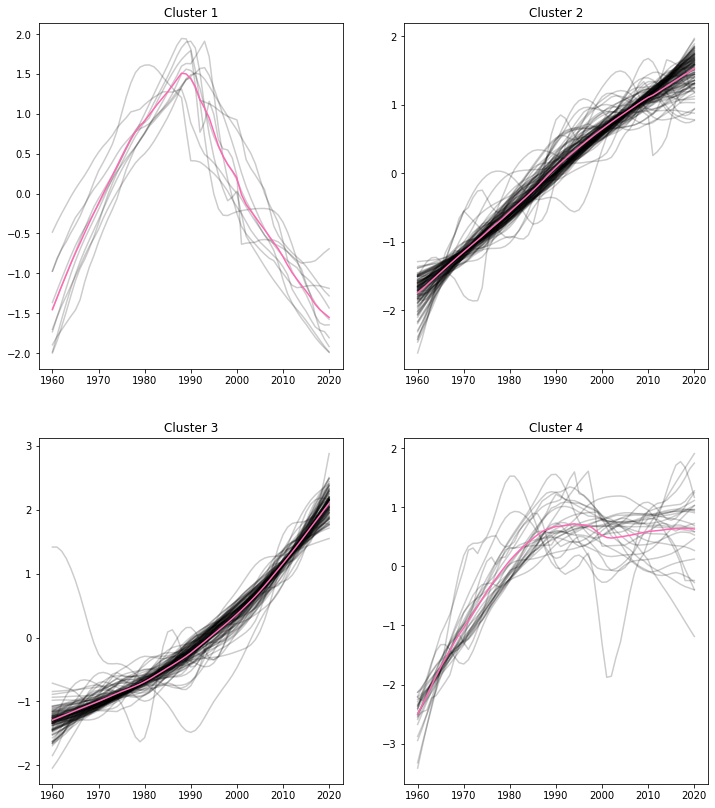

In [181]:
# probably should have done this with a loop but it's not a lot of data
# adding year ticks in subplots: https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[c[1] == 0 ].T, "k", alpha=0.2);
ax[0,0].plot(c[0][0], color="hotpink")

ax[0,1].set_title("Cluster 2")
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,1].plot(pop_standard[c[1] == 1 ].T, "k", alpha=0.2);
ax[0,1].plot(c[0][1], color="hotpink")

ax[1,0].set_title("Cluster 3")
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,0].plot(pop_standard[c[1] == 2 ].T, "k", alpha=0.2);
ax[1,0].plot(c[0][2], color="hotpink")

ax[1,1].set_title("Cluster 4")
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,1].plot(pop_standard[c[1] == 3 ].T, "k", alpha=0.2);
ax[1,1].plot(c[0][3], color="hotpink")

Figure 2: Results of using k-means clustering on the standardized data seen in Figure 1. Cluster 1 shows a population rise, then rapid fall around the 1990s (reviewing lists of countries in clusters below, these are mostly Balkan and former Soviet states so this makes some sense), cluster 2 a fairly linear upward trend with some outliers, cluster 3 a more curved upward trend, and cluster 4 kind of hits a plateau around the 1990s but there's a lot more weird outliers in there.

In [182]:
print("Countries in Each Cluster:\n")
for i in range(4):
  print("cluster {0}:\n {1} \n".format(i+1, pop_df_clean.loc[c[1] == i].index.values))


Countries in Each Cluster:

cluster 1:
 ['Bulgaria' 'Bosnia and Herzegovina' 'Estonia' 'Georgia' 'Croatia'
 'Hungary' 'Lithuania' 'Latvia' 'Romania' 'Ukraine'] 

cluster 2:
 ['Andorra' 'Argentina' 'American Samoa' 'Azerbaijan' 'Bangladesh'
 'Bahamas, The' 'Bermuda' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan'
 'Botswana' 'Central African Republic' 'Canada' 'Channel Islands' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Caribbean small states' 'Germany'
 'Djibouti' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central Asia'
 'Ecuador' 'Euro area' 'Spain' 'European Union' 'Finland' 'Fiji' 'France'
 'Micronesia, Fed. Sts.' 'Gibraltar' 'Greece' 'Guam' 'High income'
 'Hong Kong SAR, China' 'IBRD only' 'IDA & IBRD total' 'Indonesia'
 'Isle of Man' 'India' 'Iran, Islamic Rep.' 'Italy' 'Jamaica'
 'Kyrgyz Republic' 'Korea, Rep.'
 'Latin America & Caribbe

# Also: an Elbow Plot

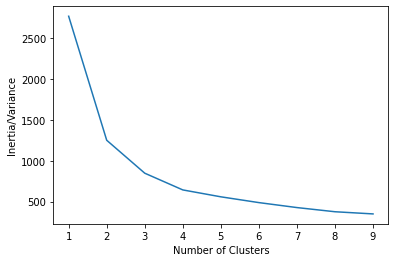

In [167]:
# not sure if this is "variance" or "inertia"--slides use variance, sklearn docs say inertia, I think it's the same thing?
inertia = []
for i in range(1,10): 
  cl = cluster.k_means(pop_standard, i)  
  inertia.append(cl[2])

pl.plot(range(1,10), inertia)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");

Figure 3: "Elbow plot" of k-means clustering of our time series. The y axis shows the sum of squared distances to the closest centroid (scikit calls this "inertia", Fed called it "variance"). The point where inertia/variance dramatically drops in an elbow plot is recommended as the preferred number of clusters; this line has a bit too much of a gradual descent to make an effective recommendation. 